In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#preparing the data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [13]:
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [4]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")


In [5]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

[[5.96242338]]


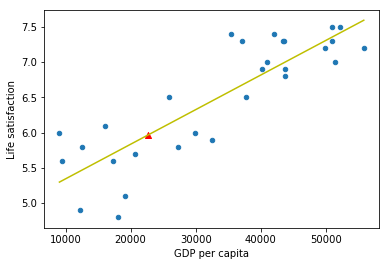

In [14]:
#Linear Regression which will be model learning
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.scatter(x=X_new,y=model.predict(X_new),marker='^',c='r')
plt.plot(X,model.predict(X),c='y')
plt.show()

[[5.58]]


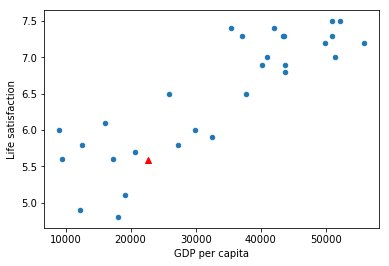

In [25]:
#for instance based learning for which we use KNN
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(X,y)
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[5.58]]
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.scatter(x=X_new,y=model.predict(X_new),marker='^',c='r')
plt.show()